In [2]:
#import area

import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt


In [3]:
#define function
def saddlepoint(A):

    row = len(A)
    col = len(A[0])

    Amax = np.max(np.abs(A))
    
    #for X
    
    print("===FOR X===")
    xvector = np.zeros(row)
    xvector = np.append(xvector,-1)
    #xvector = np.reshape(xvector, (-1, 1))
    A = np.array(A)
    bvector = np.transpose(-A)
    bvector = np.concatenate((bvector,np.ones((bvector.shape[0],1))),axis=1)
    #print("xvector:\n",xvector)
    #print("bvector:\n",bvector)
    aeqx = np.ones(row)
    aeqx = np.append(aeqx,0)
    aeqx = np.reshape(aeqx, (1, -1))
    beqx = 1
    box = np.zeros(col)
    lbox = np.zeros(row)
    lbox = np.append(lbox,-Amax)
    lbox = np.reshape(lbox, (-1, 1))
    ubox = np.ones(row)
    ubox = np.append(ubox,Amax)
    ubox = np.reshape(ubox, (-1, 1))
    bunds = np.concatenate((lbox,ubox),axis=1)
    
    #print("aeqx:\n",aeqx)
    #print("beqx:\n",beqx)
    #print("box:\n",box)
    #print("lbox:\n",lbox)
    #print("ubox:\n",ubox)
    
    X = linprog(c=xvector,A_ub=bvector,b_ub=box,A_eq=aeqx,b_eq=beqx, bounds=bunds, method="revised simplex")
    print("X saddle point:\n",X.x)

    #for Y
    print("===FOR Y===")    
    yvector = np.zeros(col)
    yvector = np.append(yvector,-1)
  
    y_bvector = A
    y_bvector = np.concatenate((y_bvector,np.ones((y_bvector.shape[0],1))),axis=1)

    #print("yvector:\n",yvector)
    #print("y_bvector:\n",y_bvector)
    y_aeqx = np.ones(col)
    y_aeqx = np.append(y_aeqx,0)
    y_aeqx = np.reshape(y_aeqx, (1, -1))
    y_beqx = 1
    y_box = np.zeros(row)
    y_lbox = np.zeros(col)
    y_lbox = np.append(y_lbox,-Amax)
    y_lbox = np.reshape(y_lbox, (-1, 1))
    y_ubox = np.ones(col)
    y_ubox = np.append(y_ubox,Amax)
    y_ubox = np.reshape(y_ubox, (-1, 1))
    y_bunds = np.concatenate((y_lbox,y_ubox),axis=1)
    
    #print("y_aeqx:\n",y_aeqx)
    #print("y_beqx:\n",y_beqx)
    #print("y_box:\n",y_box)
    #print("y_lbox:\n",y_lbox)
    #print("y_ubox:\n",y_ubox)
    
    
    Y = linprog(c=yvector,A_ub=y_bvector,b_ub=y_box,A_eq=y_aeqx,b_eq=y_beqx, bounds=y_bunds, method="revised simplex")
    y = Y.x    
    print("Y saddle point:\n",y)

    

In [4]:
#Result
A1 = [[4, 3, 1, 4],[2, 5, 6, 3],[1, 0, 7, 0]]
A2 = [[0,5,-2],[-3,0,4],[6,-4,0]]
A3 = [[5,8,3,1,6],[4,2,6,3,5],[2,4,6,4,1],[1,3,2,5,3]]
print("---------------------------Q1---------------------------")
saddlepoint(A1)
print("---------------------------Q2---------------------------")
saddlepoint(A2)
print("---------------------------Q3---------------------------")
saddlepoint(A3)

---------------------------Q1---------------------------
===FOR X===
X saddle point:
 [0.57142857 0.42857143 0.         3.14285714]
===FOR Y===
Y saddle point:
 [ 0.71428571  0.          0.28571429  0.         -3.14285714]
---------------------------Q2---------------------------
===FOR X===
X saddle point:
 [0.36363636 0.34965035 0.28671329 0.67132867]
===FOR Y===
Y saddle point:
 [ 0.30769231  0.29370629  0.3986014  -0.67132867]
---------------------------Q3---------------------------
===FOR X===
X saddle point:
 [0.16216216 0.54054054 0.         0.2972973  3.27027027]
===FOR Y===
Y saddle point:
 [ 0.37837838  0.10810811  0.          0.51351351  0.         -3.27027027]


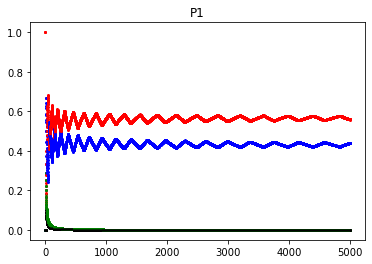

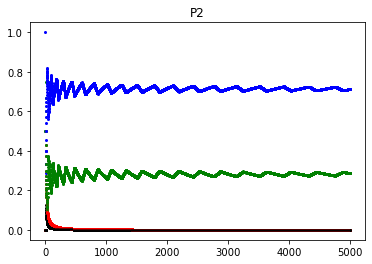

In [25]:
# Q4
A = [[4, 3, 1, 4],[2, 5, 6, 3],[1, 0, 7, 0]]

row = len(A)
col = len(A[0])

X = np.eye(row,1)
Y = np.eye(col,1)

for n in range (1,5000):
    
    x = X/n
    y = Y/n

    p1 = np.dot(A,y)
    p2 = np.dot(np.transpose(x),A)
    #print(p1)

    #pure strategy
    p1max = np.max(p1)
    p2min = np.min(p2)
    m1 = np.argmax(p1)
    m2 = np.argmin(p2)


    X[m1] = X[m1]+1
    Y[m2] = Y[m2]+1
    
    if p1max == p2min :
        break
    #print(x[0])
    #plot area
    #print(y)
    plt.figure(1)
    plt.title("P1")
    plt.plot(n,x[0],'ro',markersize=2)
    plt.plot(n,x[1],'bo',markersize=2)
    plt.plot(n,y[1],'go',markersize=2)
    plt.plot(n,y[3],'ko',markersize=2)
    plt.figure(2)
    plt.title("P2")
    plt.plot(n,x[2],'ro',markersize=2)
    plt.plot(n,y[0],'bo',markersize=2)
    plt.plot(n,y[2],'go',markersize=2)
    plt.plot(n,y[3],'ko',markersize=2)
    

plt.show()







